# Minstakvadrat-metoden med tillämpningar

## Linjär regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt


- Vektor X, Y med x-koord och Y-koord
- Vi vill anpassa linje y = kx +m
- Bestämmer k, m genom att minstakvadrat-lösa AZ=B där Z^t=(k m)

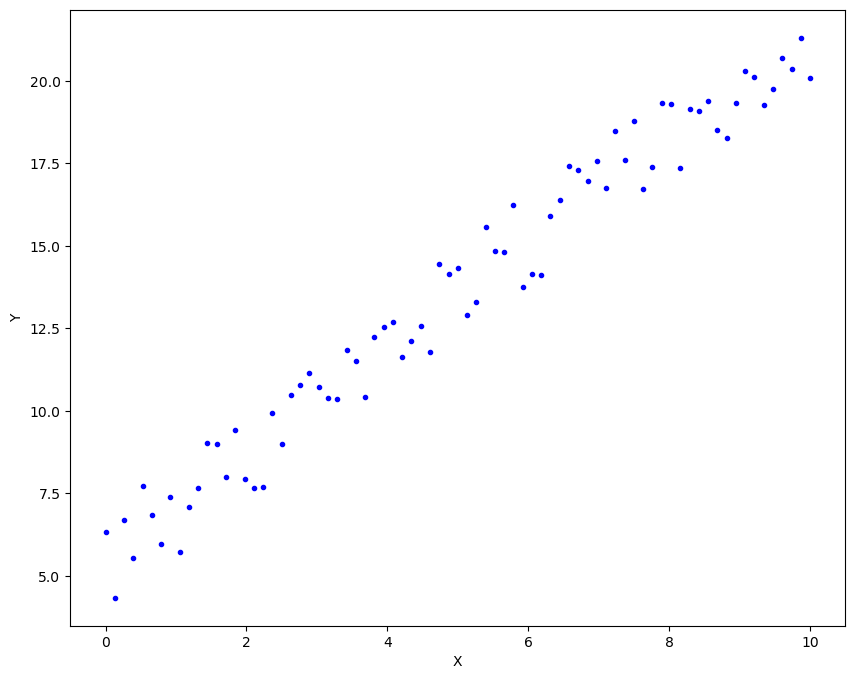

In [4]:
# generate X and Y
number_pts=77
true_m = 4
true_k = 1.6 
spread = 3
X = np.linspace(0, 10, number_pts)
Y = true_m + true_k*X + spread*np.random.random(len(X))

plt.figure(figsize = (10,8))
plt.plot(X, Y, 'b.')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [5]:
# assemble matrix A
A = np.vstack([X, np.ones(len(X))]).T
# turn Y into a column vector
B = Y[:, np.newaxis]
A[:10],B[:10]

(array([[0.        , 1.        ],
        [0.13157895, 1.        ],
        [0.26315789, 1.        ],
        [0.39473684, 1.        ],
        [0.52631579, 1.        ],
        [0.65789474, 1.        ],
        [0.78947368, 1.        ],
        [0.92105263, 1.        ],
        [1.05263158, 1.        ],
        [1.18421053, 1.        ]]),
 array([[6.33700204],
        [4.33637646],
        [6.69660939],
        [5.54345466],
        [7.72613159],
        [6.85182105],
        [5.97105943],
        [7.39378366],
        [5.71082043],
        [7.09547684]]))

In [6]:
# Löser normalekvationerna A^t*A*Z=A^t*B
# genom Z = (A^t*A)^{-1}*A^t*B
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),B)
print(alpha)


[[1.56705718]
 [5.72133939]]


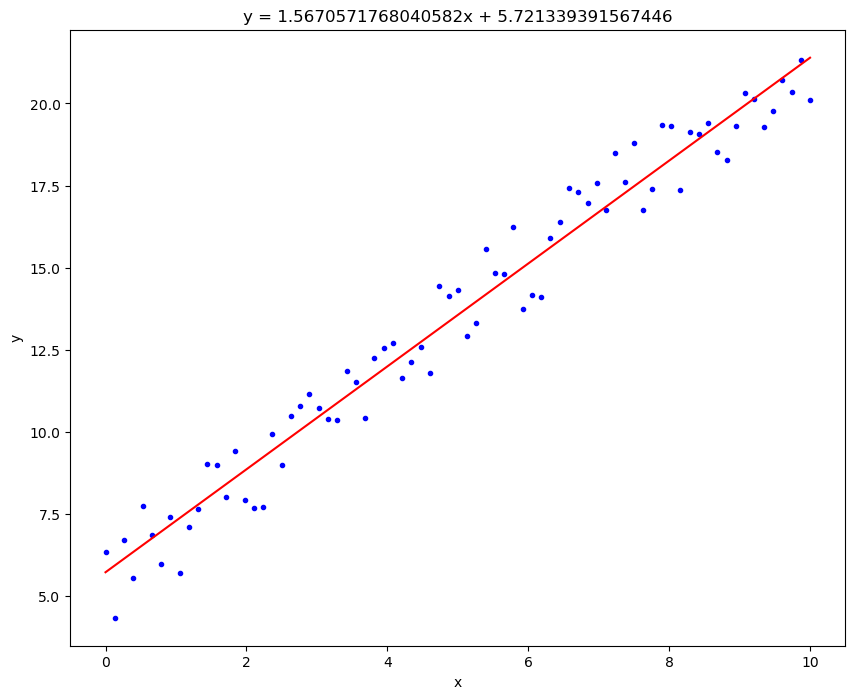

In [7]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(X, Y, 'b.')
plt.plot(X, alpha[0]*X + alpha[1], 'r')
plt.title(f'y = {alpha[0][0]}x + {alpha[1][0]}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Anpassning till polynom av okänd grad
Om $y = cx^d$ approximativt, så är
$\log(y) = \log(c) + d\log(x)$.
Om vi hittar (m,k) som anpassar rät linje till $(\log(x_i),\log(y_i))$
så kommer alltså $c=\exp{m}$, $d=k$ vara bra approximation med polynom.

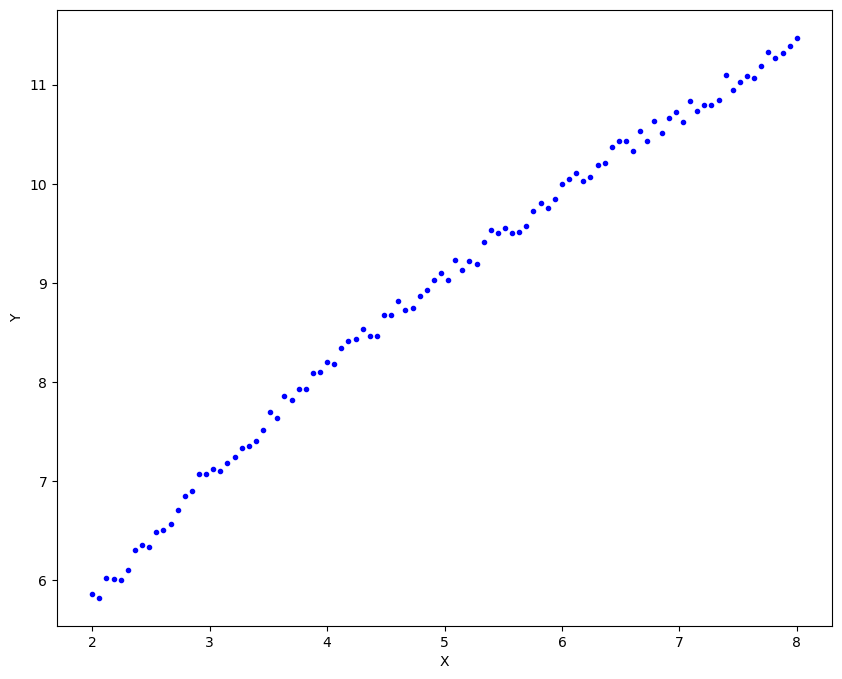

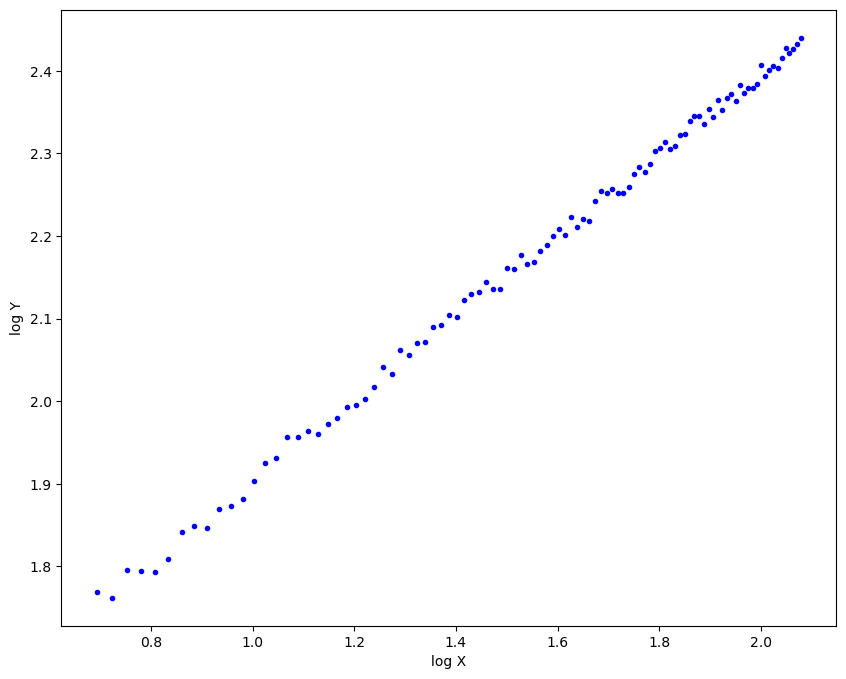

In [10]:
# generate X and Y
true_c = 4
true_d= 0.5
number_pts=100
spread= 1/4
# no zeroes in X or Y, we are gonna log!
X = np.linspace(2, 8, number_pts)
Y = true_c*X**true_d +  spread*np.random.random(len(X))
lX = np.log(X)
lY = np.log(Y)

plt.figure(figsize = (10,8))
plt.plot(X, Y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.figure(figsize = (10,8))
plt.plot(lX, lY, 'b.')
plt.xlabel('log X')
plt.ylabel('log Y')
plt.show()

In [11]:
# assemble matrix A
A = np.vstack([lX, np.ones(len(lX))]).T
# turn Y into a column vector
B = lY[:, np.newaxis]
print(A[:10])
print(B[:10])
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),B)
print(alpha)


[[0.69314718 1.        ]
 [0.72300014 1.        ]
 [0.75198768 1.        ]
 [0.78015856 1.        ]
 [0.80755753 1.        ]
 [0.83422578 1.        ]
 [0.86020127 1.        ]
 [0.88551907 1.        ]
 [0.91021169 1.        ]
 [0.93430924 1.        ]]
[[1.76895537]
 [1.76206035]
 [1.79508472]
 [1.79451876]
 [1.79266813]
 [1.80837832]
 [1.8415558 ]
 [1.84896975]
 [1.84621964]
 [1.86954313]]
[[0.49240488]
 [1.41243882]]


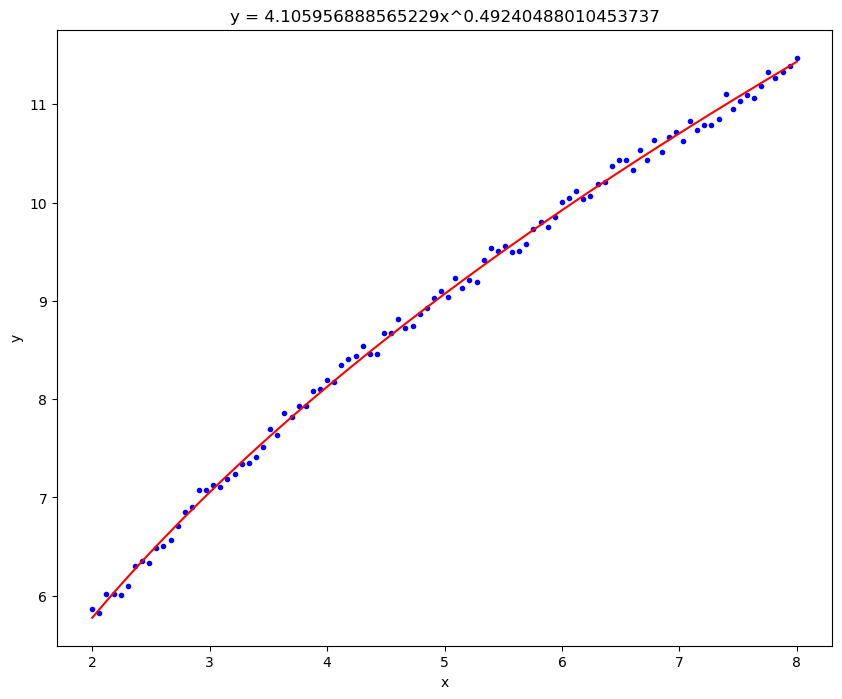

In [12]:
# plot the results
import math
plt.figure(figsize = (10,8))
plt.plot(X, Y, 'b.')
plt.plot(X, math.exp(alpha[1][0])*X**alpha[0][0], 'r')
plt.title(f'y = {math.exp(alpha[1][0])}x^{alpha[0][0]}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Anpassning till tredjegradspolynom
Vi anpassar $y =a_3x^3 + a_2x^2 + a_1x + a_0$ 

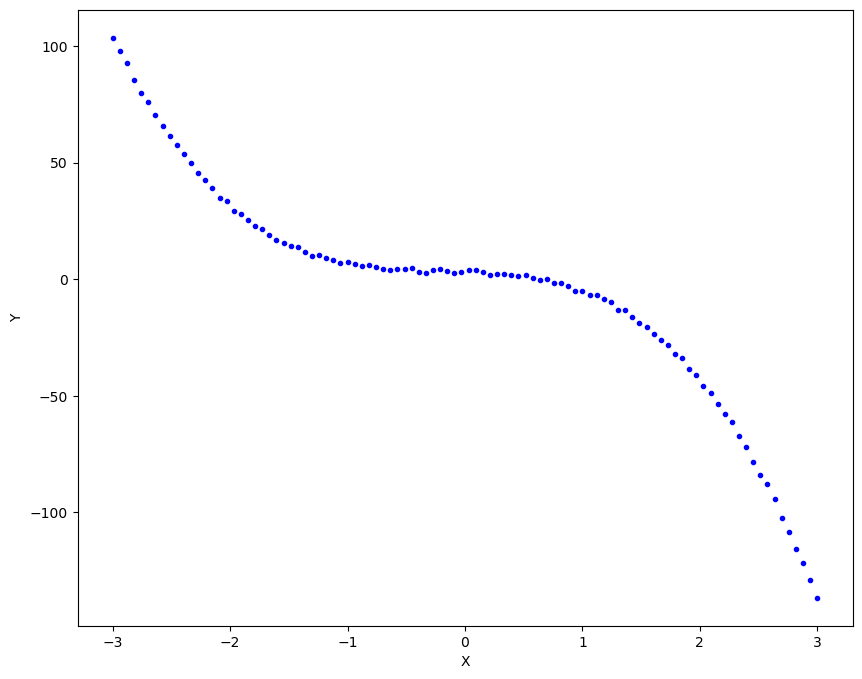

In [17]:
# generate X and Y
a = [2.0, -1.5, -2.2, -4.3]
number_pts=100
spread=2
# no zeroes in X or Y, we are gonna log!
X = np.linspace(-3, 3, number_pts)
Y = a[0] + a[1]*X + a[2]*X**2 + a[3]*X**3 + spread*np.random.random(len(X))


plt.figure(figsize = (10,8))
plt.plot(X, Y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [18]:
# assemble matrix A
A = np.vstack([X**3, X**2, X, np.ones(len(X))]).T
# turn Y into a column vector
B = Y[:, np.newaxis]
A[:10],B[:10]

(array([[-27.        ,   9.        ,  -3.        ,   1.        ],
        [-25.3964716 ,   8.64003673,  -2.93939394,   1.        ],
        [-23.85772324,   8.28741965,  -2.87878788,   1.        ],
        [-22.38241923,   7.94214876,  -2.81818182,   1.        ],
        [-20.96922392,   7.60422406,  -2.75757576,   1.        ],
        [-19.61680163,   7.27364555,  -2.6969697 ,   1.        ],
        [-18.32381668,   6.95041322,  -2.63636364,   1.        ],
        [-17.08893341,   6.63452709,  -2.57575758,   1.        ],
        [-15.91081615,   6.32598714,  -2.51515152,   1.        ],
        [-14.78812923,   6.02479339,  -2.45454545,   1.        ]]),
 array([[103.51965091],
        [ 97.93199234],
        [ 92.63003403],
        [ 85.56751156],
        [ 79.61025411],
        [ 75.87978164],
        [ 70.56170694],
        [ 65.83358093],
        [ 61.48091317],
        [ 57.54391294]]))

In [19]:
# Löser normalekvationerna A^t*A*Z=A^t*B
# genom Z = (A^t*A)^{-1}*A^t*B
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),B)
print(alpha)

[[-4.28758158]
 [-2.20619954]
 [-1.59815001]
 [ 3.05341015]]


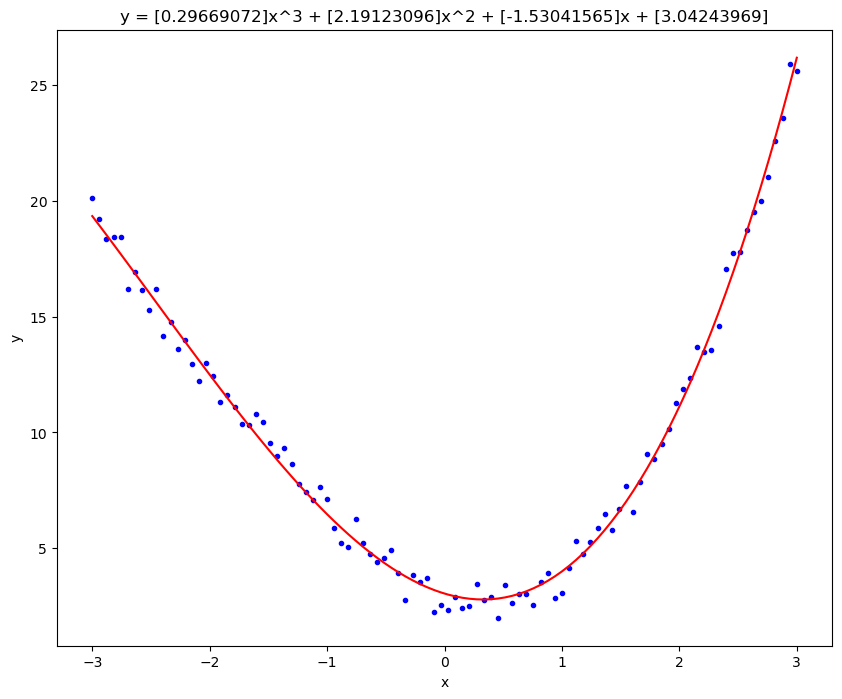

In [16]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(X, Y, 'b.')
plt.plot(X, alpha[0]*X**3 + alpha[1]*X**2 + alpha[2]*X + alpha[3], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'y = {alpha[0]}x^3 + {alpha[1]}x^2 + {alpha[2]}x + {alpha[3]}')
plt.show()

## Anpassning med plan
Antag att $z=Ax + By + C$
Hitta A,B,C

In [101]:
import numpy as np
# import plotly.graph_objects as go
import matplotlib.pyplot as plt

# generate X and Y
number_pts=20
true_A = 0.3
true_B = 0.9
true_C = -0.3
spread = 3/2
x = np.linspace(0, 1, number_pts)
y = np.linspace(0, 1, number_pts)
xx, yy = np.meshgrid(x, y)


noise = spread*np.random.random(len(xx)**2)
noise = noise.reshape(number_pts,number_pts)

zz = true_A*xx + true_B*yy + true_C
zz = zz + noise







In [102]:
xx[:2]

array([[0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ],
       [0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]])

In [103]:
# X = xx.flatten()
# Y = yy.flatten()
# Z = zz.flatten()

In [104]:
# needs plotly
#planfig = go.Figure(data=[go.Scatter3d(
#    x=X,
#    y=Y,
#    z=Z,
#    mode='markers',
#    marker=dict(
#        size=3,
#        color=Z,                # set color to an array/list of desired values
#        colorscale='Viridis',   # choose a colorscale
#        opacity=0.8
#    )
#)])

# tight layout
#planfig.update_layout(margin=dict(l=0, r=0, b=0, t=0), width=800, height=500)
#planfig.show()

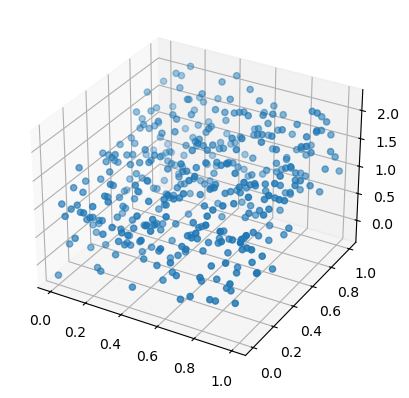

In [105]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xx, yy, zz, marker='o')
plt.show()

In [106]:
# assemble matrix A
A = np.vstack([X, Y, np.ones(len(X))]).T
# turn Z into a column vector
B = Z[:, np.newaxis]
A[:10],B[:10]

(array([[0.        , 0.        , 1.        ],
        [0.11111111, 0.        , 1.        ],
        [0.22222222, 0.        , 1.        ],
        [0.33333333, 0.        , 1.        ],
        [0.44444444, 0.        , 1.        ],
        [0.55555556, 0.        , 1.        ],
        [0.66666667, 0.        , 1.        ],
        [0.77777778, 0.        , 1.        ],
        [0.88888889, 0.        , 1.        ],
        [1.        , 0.        , 1.        ]]),
 array([[-0.0275095 ],
        [ 0.06238034],
        [-0.15536034],
        [ 0.16322372],
        [-0.14262796],
        [ 0.15143792],
        [ 0.02380345],
        [ 0.04888575],
        [ 0.43710728],
        [ 0.00215741]]))

In [107]:
# Löser normalekvationerna A^t*A*Z=A^t*B
# genom Z = (A^t*A)^{-1}*A^t*B
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),B)
print(alpha)


[[0.27627034]
 [0.42914214]
 [0.00475092]]


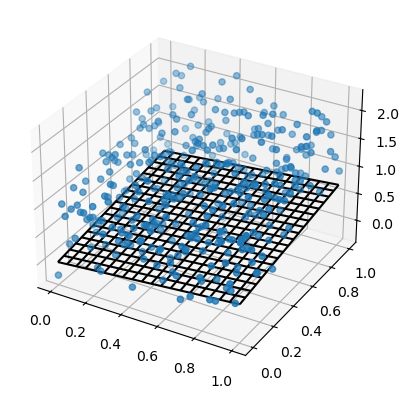

In [108]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')
ax2.scatter(xx, yy, zz, marker='o')
zzfit= alpha[0]*xx + alpha[1]*yy + alpha[2]
ax2.plot_wireframe(xx, yy, zzfit,color='black')
plt.show()

# Geometriska problem

## Avstånd linje-punkt

In [30]:
from sage.all import *
P = vector([1,2,3])
u = vector([1,0,2])
var('t')
B = vector([3,-3,8])
S = P + u*t
nollvektor = vector([0,0,0])
ekv =list(S - B) 
ekv

[t - 2, 5, 2*t - 5]

### Gör om till matriser, MK-lös

In [31]:
A = matrix(u).transpose()
BM = matrix(B).transpose()
ATA = A.transpose()*A
ATB = A.transpose()*BM
ATA,ATB

([5], [19])

In [32]:
t0 = ATA.solve_right(ATB)[0][0]
Q = P + t0*u
felvektor = Q - B
felnorm = felvektor.norm()
t0, Q, felvektor, felnorm

(19/5, (24/5, 2, 53/5), (9/5, 5, 13/5), sqrt(35))

## Avstånd plan till punkt

In [1]:
from sage.all import *
P = vector([1,2,3])
u = vector([1,0,2])
v = vector([1,1,1])
Q = vector([4,4,4])
# plan genom P, riktningar u, v
# bestäm avstånd till Q

In [10]:
var('s,t')
S = P + s*u + t*v
ekv = S - Q
ekv

(s + t - 3, t - 2, 2*s + t - 1)

In [5]:
A = matrix([u,v]).transpose()
A

[1 1]
[0 1]
[2 1]

In [14]:
B = matrix(Q-P).transpose()
B

[3]
[2]
[1]

In [15]:
Xp = (A.transpose()*A).solve_right(A.transpose()*B)
Xp

[-1/2]
[ 5/2]

In [16]:
s0,t0 = Xp[0][0], Xp[1][0]
s0,t0

(-1/2, 5/2)

In [17]:
# närmsta punkt i planet
Sp = P + s0*u +t0*v
Sp

(3, 9/2, 9/2)

In [18]:
(Q - Sp).inner_product(u)

0

In [19]:
(Q - Sp).inner_product(v)

0

In [21]:
# avstånd
(Q-Sp).norm()

sqrt(3/2)

## Avstånd mellan två linjer

In [49]:
from sage.all import *
A = vector([1,2,3])
u = vector([1,0,2])
var('s,t')
B = vector([3,-3,8])
v  = vector([1,1,1])
P = A + s*u
Q = B + t*v
ekv =list(P - Q) 
ekv

[s - t - 2, -t + 5, 2*s - t - 5]

In [50]:
MA = matrix([u,-v]).transpose()
MA

[ 1 -1]
[ 0 -1]
[ 2 -1]

In [51]:
MB = matrix([B -A]).transpose()
MB

[ 2]
[-5]
[ 5]

In [52]:
Xp= (MA.transpose()*MA).solve_right(MA.transpose()*MB)
Xp

[   5]
[13/3]

In [53]:
s0,t0 = Xp[0][0], Xp[1][0]
s0,t0

(5, 13/3)

In [54]:
P0 = A + s0*u
Q0 = B + t0*v
P0,Q0

((6, 2, 13), (22/3, 4/3, 37/3))

In [55]:
FEL = P0- Q0
FEL

(-4/3, 2/3, 2/3)

In [56]:
FEL.inner_product(u)

0

In [57]:
FEL.inner_product(v)

0